In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from lib import *
import scipy

In [2]:
img_file = "../data/train-images-idx3-ubyte"
x_train = parsing_file(img_file)

In [3]:
xs_train, mnist_mean = pre_process(x_train)

In [4]:
mnist_mean

0.1306604762738429

In [5]:
xs_train.shape

(60000, 784)

# Loading optimization variables

In [6]:
lambda_ = np.load("../NCE_results/precision_matrix_mask.npy")

In [8]:
lambda_.dtype

dtype('float64')

In [9]:
L = np.linalg.cholesky(lambda_)

In [10]:
res = mnist_mean + scipy.linalg.solve_triangular(L, np.random.normal(size=28**2), lower=True)
res = res.reshape(28, 28)

# Results

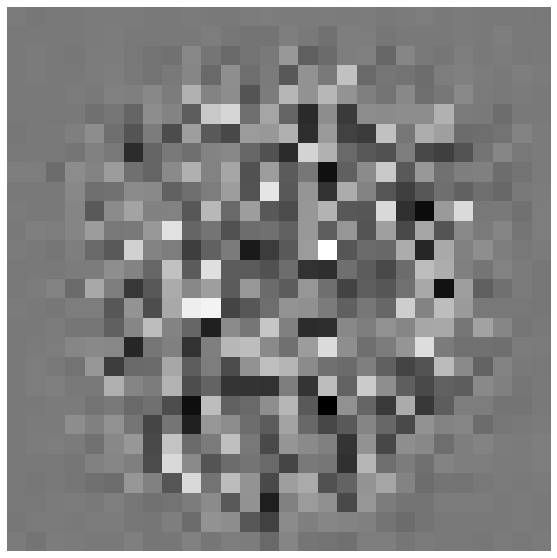

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray");
plt.axis("off");